# IMPLEMENTATION OF SGD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
dataset= load_boston()

In [3]:
dataset.data.shape

(506, 13)

In [4]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
import pandas as pd
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
df['price'] = dataset.target

In [8]:
X = df.drop('price', axis=1)
y = df['price']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [11]:
#Standardize the values
from sklearn.preprocessing import StandardScaler
sc_X_1 = StandardScaler()
X_train_1 = sc_X_1.fit_transform(X_train)
X_test_1 = sc_X_1.transform(X_test)

In [13]:
print(X_train_1.shape)
print(y_train_1.shape)

(354, 13)
(354,)


In [14]:
X_train_1

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

## 1. By Sklearn

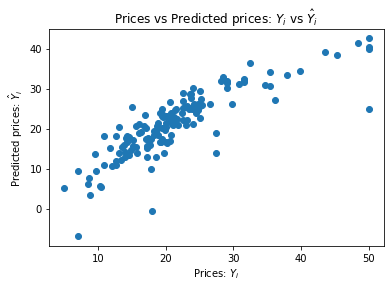

In [15]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_1, y_train_1)

y_pred = lm.predict(X_test_1)

plt.scatter(y_test_1, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## 2. From scratch

In [16]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [19]:
X_train.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04


In [20]:
X_train.index

Int64Index([  5, 116,  45,  16, 468, 360,   3, 405, 185,  60,
            ...
            121, 505,  20, 188,  71, 106, 270, 348, 435, 102],
           dtype='int64', length=354)

In [22]:
#Standardizing
from sklearn.preprocessing import StandardScaler
sc_X_2 = StandardScaler()
X_train_2 = sc_X_2.fit_transform(X_train)
X_test_2 = sc_X_2.transform(X_test)

In [23]:
X_train_2 = pd.DataFrame(X_train_2, columns=dataset.feature_names, index= X_train.index)
X_train_2.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,-0.414259,-0.505125,-1.292142,-0.281546,-0.851085,0.145264,-0.365584,1.081628,-0.746179,-1.112790,0.187271,0.396514,-1.015316
116,-0.402008,-0.505125,-0.162083,-0.281546,-0.087967,-0.208401,0.133941,-0.487876,-0.398464,0.150088,-0.212090,0.387067,-0.053663
45,-0.397211,-0.505125,-0.609489,-0.281546,-0.936828,-0.896237,-1.266900,0.628596,-0.746179,-1.046639,-0.167716,0.428541,-0.311324


In [25]:
import warnings
warnings.filterwarnings('ignore')

training_data_2 = X_train_2
training_data_2['price'] = y_train_2
training_data_2.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
5,-0.414259,-0.505125,-1.292142,-0.281546,-0.851085,0.145264,-0.365584,1.081628,-0.746179,-1.112790,0.187271,0.396514,-1.015316,28.7
116,-0.402008,-0.505125,-0.162083,-0.281546,-0.087967,-0.208401,0.133941,-0.487876,-0.398464,0.150088,-0.212090,0.387067,-0.053663,21.2
45,-0.397211,-0.505125,-0.609489,-0.281546,-0.936828,-0.896237,-1.266900,0.628596,-0.746179,-1.046639,-0.167716,0.428541,-0.311324,19.3
16,-0.290936,-0.505125,-0.431970,-0.281546,-0.165136,-0.543965,-1.429789,0.345133,-0.630274,-0.601625,1.207859,0.312760,-0.822422,23.1
468,1.457816,-0.505125,1.005500,-0.281546,0.194987,-0.556496,0.079645,-0.403892,1.687825,1.557294,0.852872,0.104124,0.803800,19.1


In [26]:
def cost_function(weights, bias, features, target):
  totalError = 0
  for i in range(len(features)):
    x = features
    y = target
    totalError += (y[:,1] - np.dot(x[i], weights) + bias)**2  
    return totalError/len(x)

In [27]:
#https://github.com/premvardhan/Stochastic-Gradient-descent-in-python/blob/master/LinearRegression_on_bostan_house_price_using_SGD_reopen.ipynb
def ImplementSGD(w0, b0, training_data, X_test, y_test, learning_rate, iterations, m):
    loss_train = []
    loss_test = []
    grad_W = 0
    grad_b = 0
    
    for iter in range(iterations):

        #training batch
        train_sample = training_data.sample(m)
        y = np.asmatrix(train_sample['price'])
        x = np.asmatrix(train_sample.drop(['price'], axis=1))

        for i in range(len(x)):
            grad_W += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w0) + b0))
            grad_b += -2*(y[:,i] - (np.dot(x[i] , w0) + b0))

            w1 = w0 - learning_rate * grad_W
            b1 = b0 - learning_rate * grad_b

        if (w0==w1).all():
            break

        else:
            w0 = w1
            b0 = b1
            learning_rate = learning_rate/2

        error_train = cost_function(w0, b0, x, y)
        loss_train.append(error_train)
        error_test = cost_function(w0, b0, np.asmatrix(X_test), np.asmatrix(y_test))
        loss_test.append(error_test)

    return w0, b0, loss_train, loss_test

In [531]:
#w0 = np.asmatrix(np.random.rand(13)).T
#b0 = np.random.rand()
w0 = np.asmatrix(np.zeros(13)).T
b0 = 0
W,b, loss_train, loss_test = ImplementSGD(w0, b0, training_data_2, X_test_2, y_test_2, 0.001 , 2500, 177)

In [532]:
print(W)
print(b)

[[ 0.39757704]
 [ 0.49149552]
 [-0.14612561]
 [ 0.80366253]
 [ 0.39242645]
 [ 3.08664273]
 [-0.2078443 ]
 [-1.17380315]
 [ 0.83002523]
 [ 0.35558206]
 [-0.93041063]
 [ 1.73416789]
 [-4.00053788]]
[[23.18309227]]


### Predict the test data using Implemented SGD Weights and bias

In [30]:
def predict(testing_data, weights , bias):
    y_pred = []
    for i in range(testing_data.shape[0]):
        x = np.asmatrix(testing_data)
        y = (np.dot(x[i] , weights) + bias)
        #print(y.shape)
        y_pred.append(y)

    return np.array(y_pred)

In [533]:
y_pred_test = predict(X_test_2, W,b)

In [534]:
y_pred_test = y_pred_test.reshape(-1,1)

### Comparing both the results

In [34]:
# RMSE for Sklearn library predictions
from sklearn.metrics import mean_squared_error
#from math import sqrt
MSE_1 = mean_squared_error(y_test_1, y_pred)
print('Mean Squared Error:', MSE_1)

Mean Squared Error: 21.51744423117721


In [424]:
#RMSE for our own implementations of SGD
from sklearn.metrics import mean_squared_error
#from math import sqrt
MSE_2 = mean_squared_error(y_test_2, y_pred_test)
print('Mean Squared Error:', MSE_2)

Mean Squared Error: 25.360046548960746


### Note:
- I can't reduce much more of MSE_2 even after i changed different iterations, learning rate and epochs.

Text(0.5, 1.0, 'Distribution of Y_pred predicted by ImplementSGD')

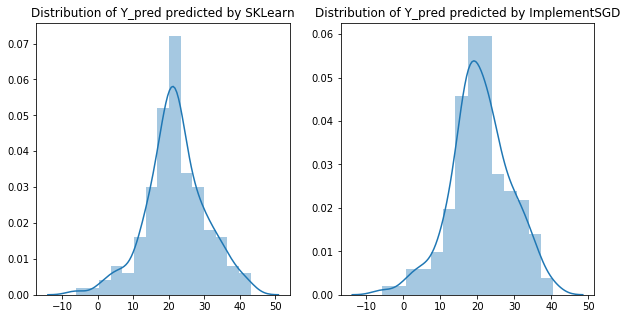

In [37]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
sns.distplot(y_pred)
plt.title('Distribution of Y_pred predicted by SKLearn')

ax2 = fig.add_subplot(122)
sns.distplot(y_pred_test)
plt.title('Distribution of Y_pred predicted by ImplementSGD')

### Summary:
    - It looks like the distribution of both the data are in almost similar and their mean is also at around 20 for both of them

## Conclusion:

In [425]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Model', 'Root Mean Squared Error']
x.add_row(['Sklearn', str('%4f'%MSE_1)])
x.add_row(['SGD from scratch', str('%4f'%MSE_2)])
print(x)

+------------------+-------------------------+
|      Model       | Root Mean Squared Error |
+------------------+-------------------------+
|     Sklearn      |        21.517444        |
| SGD from scratch |        25.360046        |
+------------------+-------------------------+


- We can see that the RMSE for Sklearn prediction is: 21.51 and RMSE for our own implemented SGD is 25.36 and since it almost close to each other we can say that our SGD implementation working good